# LCR circuit (SKP)

## LCR circuit in DC supply:

Charging of capacitor, $$ L\frac{di}{dt} + \frac{q}{C} + iR = V $$

$$ q''+2bq'+\omega_0^2q = \frac{V}{L}  $$
$ 2b=R/L, \omega_0^2=1/LC$.

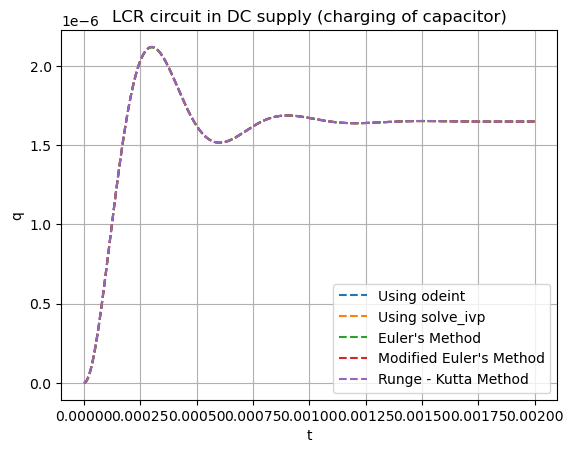

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.integrate import odeint
from scipy.integrate import solve_ivp

V = 5        # supply dc voltage
L = 24e-3      # inductance
C = 0.33e-6    # capacitance
R = 200        # resistance
b = R/(2*L)
w0 = (1/(L*C))**0.5

# Write the differential equation. (x=t,dy/dx=yp)

def dSdx(x,S):
    y, yp = S
    return [yp, -2*b*yp -w0**2*y +(V/L)] 

def dydx(x,y,yp):
    return yp
def dypdx(x,y,yp):
    return -2*b*yp -w0**2*y +(V/L)

x_0, y_0, yp_0 = 0, 0, 0  # initial conditions
x_min, x_max = x_0, 2e-3   # lower and upper limit of x
dx = (x_max-x_0)/1000    # infinitesimal length

# Using odeint
y0, yp0 = y_0, yp_0
S0 = (y0,yp0)
x = np.linspace(x_min, x_max,200)
sol = odeint(dSdx, y0=S0, t=x, tfirst=True)
y1 = sol.T[0]
plt.plot(x,y1, '--', label='Using odeint')

# Using solve_ivp
y0, yp0 = y_0, yp_0
S0 = (y0,yp0)
x = np.linspace(x_min, x_max,200)
sol = solve_ivp(dSdx, t_span=(min(x), max(x)), y0=S0, t_eval=x)
y1 = sol.y[0]
plt.plot(x,y1, '--', label='Using solve_ivp')

# Euler's Method
x, y, yp = x_0, y_0, yp_0
xmax = x_max
h = dx
xx, yy, yyp = [], [], []
while abs(x) < abs(xmax):
    xx.append(x)
    yy.append(y)
    yyp.append(yp)
    x += h
    y += h*dydx(x,y,yp)
    yp += h*dypdx(x,y,yp)
plt.plot(xx,yy, '--', label='Euler\'s Method')

# Modified Euler's Method
x, y, yp = x_0, y_0, yp_0
xmax = x_max
h = dx
xx, yy, yyp = [], [], []
while abs(x) < abs(xmax):
    xx.append(x)
    yy.append(y)
    yyp.append(yp)
    x += h
    dy = (h/2)*(dydx(x,y,yp) + dydx(x + h, y + h*dydx(x,y,yp), yp + h*dypdx(x,y,yp)))
    dyp = (h/2)*(dypdx(x,y,yp) + dypdx(x + h, y + h*dydx(x,y,yp), yp + h*dypdx(x,y,yp)))
    y += dy
    yp += dyp
plt.plot(xx,yy, '--', label='Modified Euler\'s Method')

# Runge - Kutta Method
x, y, yp = x_0, y_0, yp_0
xmax = x_max
h = dx
xx, yy, yyp = [], [], []
while abs(x) < abs(xmax):
    xx.append(x), yy.append(y), yyp.append(yp)
    x += h
    k1 = h * dydx(x,y,yp)
    l1 = h * dypdx(x,y, yp)
    k2 = h * dydx(x + (h/2), y + (k1/2), yp + (l1/2))
    l2 = h * dypdx(x + (h/2), y + (k1/2), yp + (l1/2))
    k3 = h * dydx(x * (h/2), y + (k2/2), yp + (l2/2))
    l3 = h * dypdx(x + (h/2), y + (k2/2), yp + (l2/2))
    k4 = h * dydx(x + h, y + k3, yp + l3)
    l4 = h * dypdx(x + h, y + k3, yp + l3)
    y += (1/6)*(k1 + 2*(k2 + k3) + k4)
    yp += (1/6)*(l1 + 2*(l2 + l3) + l4)
plt.plot(xx,yy, '--', label='Runge - Kutta Method')

plt.xlabel('t')
plt.ylabel('q')
plt.title('LCR circuit in DC supply (charging of capacitor)')
plt.legend()
plt.grid()
plt.show()

Discharging of capacitor, $$ L\frac{di}{dt} + \frac{q}{C} + iR = 0 $$

$$ q''+2bq'+\omega_0^2q = 0  $$
$ 2b=R/L, \omega_0^2=1/LC$.

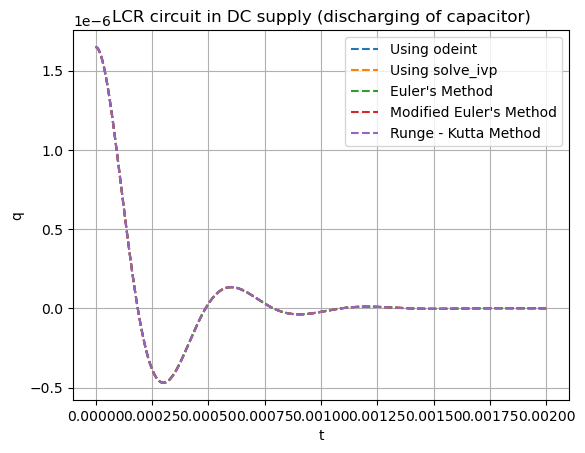

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.integrate import odeint
from scipy.integrate import solve_ivp

V = 5        # supply dc voltage (off)
L = 24e-3      # inductance
C = 0.33e-6    # capacitance
R = 200        # resistance
b = R/(2*L)
w0 = (1/(L*C))**0.5
q0 = V*C

# Write the differential equation. (x=t,y=q)

def dSdx(x,S):
    y, yp = S
    return [yp, -2*b*yp -w0**2*y] 

def dydx(x,y,yp):
    return yp
def dypdx(x,y,yp):
    return -2*b*yp -w0**2*y

x_0, y_0, yp_0 = 0, q0, 0  # initial conditions
x_min, x_max = x_0, 2e-3   # lower and upper limit of x
dx = (x_max-x_0)/1000    # infinitesimal length

# Using odeint
y0, yp0 = y_0, yp_0
S0 = (y0,yp0)
x = np.linspace(x_min, x_max,200)
sol = odeint(dSdx, y0=S0, t=x, tfirst=True)
y1 = sol.T[0]
plt.plot(x,y1, '--', label='Using odeint')

# Using solve_ivp
y0, yp0 = y_0, yp_0
S0 = (y0,yp0)
x = np.linspace(x_min, x_max,200)
sol = solve_ivp(dSdx, t_span=(min(x), max(x)), y0=S0, t_eval=x)
y1 = sol.y[0]
plt.plot(x,y1, '--', label='Using solve_ivp')

# Euler's Method
x, y, yp = x_0, y_0, yp_0
xmax = x_max
h = dx
xx, yy, yyp = [], [], []
while abs(x) < abs(xmax):
    xx.append(x)
    yy.append(y)
    yyp.append(yp)
    x += h
    y += h*dydx(x,y,yp)
    yp += h*dypdx(x,y,yp)
plt.plot(xx,yy, '--', label='Euler\'s Method')

# Modified Euler's Method
x, y, yp = x_0, y_0, yp_0
xmax = x_max
h = dx
xx, yy, yyp = [], [], []
while abs(x) < abs(xmax):
    xx.append(x)
    yy.append(y)
    yyp.append(yp)
    x += h
    dy = (h/2)*(dydx(x,y,yp) + dydx(x + h, y + h*dydx(x,y,yp), yp + h*dypdx(x,y,yp)))
    dyp = (h/2)*(dypdx(x,y,yp) + dypdx(x + h, y + h*dydx(x,y,yp), yp + h*dypdx(x,y,yp)))
    y += dy
    yp += dyp
plt.plot(xx,yy, '--', label='Modified Euler\'s Method')

# Runge - Kutta Method
x, y, yp = x_0, y_0, yp_0
xmax = x_max
h = dx
xx, yy, yyp = [], [], []
while abs(x) < abs(xmax):
    xx.append(x), yy.append(y), yyp.append(yp)
    x += h
    k1 = h * dydx(x,y,yp)
    l1 = h * dypdx(x,y, yp)
    k2 = h * dydx(x + (h/2), y + (k1/2), yp + (l1/2))
    l2 = h * dypdx(x + (h/2), y + (k1/2), yp + (l1/2))
    k3 = h * dydx(x * (h/2), y + (k2/2), yp + (l2/2))
    l3 = h * dypdx(x + (h/2), y + (k2/2), yp + (l2/2))
    k4 = h * dydx(x + h, y + k3, yp + l3)
    l4 = h * dypdx(x + h, y + k3, yp + l3)
    y += (1/6)*(k1 + 2*(k2 + k3) + k4)
    yp += (1/6)*(l1 + 2*(l2 + l3) + l4)
plt.plot(xx,yy, '--', label='Runge - Kutta Method')

plt.xlabel('t')
plt.ylabel('q')
plt.title('LCR circuit in DC supply (discharging of capacitor)')
plt.legend()
plt.grid()
plt.show()

## LCR circuit in AC supply: